## Classificação Geral

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/home/matteus/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
def cabecalho(msg):
    print(f"\n{'#' * 50}\n{msg}\n{'#' * 50}")

In [3]:
seed = 50
np.random.seed(seed)


In [4]:
df = pd.read_csv('./../data/processed/dataset_pbe_prototype_com_metais.csv')
df.drop(columns=['Unnamed: 0'], axis='columns', inplace=True)
# cabecalho('Dataset com Metais')
# print(df.sample(10, random_state=seed))

In [5]:
cabecalho('Quantidade de prototipos por classe')
print(df['layergroup'].value_counts())  


##################################################
Quantidade de prototipos por classe
##################################################
layergroup
p-3m1     1067
p-6m2      536
pmmn       525
p3m1       391
p4/nmm     362
          ... 
p4/nbm       3
p321         2
pb2n         2
p4bm         1
p112/m       1
Name: count, Length: 69, dtype: int64


In [6]:
df.dropna(subset=['layergroup'], inplace=True)

In [7]:
df['layergroup'] = pd.factorize(df['layergroup'])[0]

In [8]:
labels, uniques = pd.factorize(df['layergroup'])
df['layergroup'] = labels
layergroup_mapping = dict(enumerate(uniques))

In [9]:
df.head(10)

,Material,layergroup,Band gap,media_Z,media_pon_Z,max_Z,min_Z,desvio_Z,desvio_pon_Z,media_Electronegativity,...,max_NumberUnfilledOrbitals,min_NumberUnfilledOrbitals,desvio_NumberUnfilledOrbitals,desvio_pon_NumberUnfilledOrbitals,media_Polarizability,media_pon_Polarizability,max_Polarizability,min_Polarizability,desvio_Polarizability,desvio_pon_Polarizability
0,MoS2,0,0.000000,29.0,24.666667,42,16,13.0,13.703203,2.37,...,6.0,2.0,2.0,2.108185,52.685,41.580000,86.0,19.37,33.315,35.117093
1,MoS2,1,0.000000,29.0,24.666667,42,16,13.0,13.703203,2.37,...,6.0,2.0,2.0,2.108185,52.685,41.580000,86.0,19.37,33.315,35.117093
2,MoS2,2,1.580389,29.0,24.666667,42,16,13.0,13.703203,2.37,...,6.0,2.0,2.0,2.108185,52.685,41.580000,86.0,19.37,33.315,35.117093
3,Mo2S4,3,0.051028,29.0,24.666667,42,16,13.0,13.703203,2.37,...,6.0,2.0,2.0,2.108185,52.685,41.580000,86.0,19.37,33.315,35.117093
4,Co2S4,3,0.000000,21.5,19.666667,27,16,5.5,5.797509,2.23,...,3.0,2.0,0.5,0.527046,36.185,30.580000,53.0,19.37,16.815,17.724566
5,IrI2,1,0.000000,65.0,61.000000,77,53,12.0,12.649111,2.43,...,3.0,1.0,1.0,1.054093,42.800,40.066667,51.0,34.60,8.200,8.643559
6,IrI2,0,0.000000,65.0,61.000000,77,53,12.0,12.649111,2.43,...,3.0,1.0,1.0,1.054093,42.800,40.066667,51.0,34.60,8.200,8.643559
7,IrI2,2,0.000000,65.0,61.000000,77,53,12.0,12.649111,2.43,...,3.0,1.0,1.0,1.054093,42.800,40.066667,51.0,34.60,8.200,8.643559
8,Rb4O2,1,0.337676,22.5,27.333333,37,8,14.5,15.284342,2.13,...,2.0,1.0,0.5,0.527046,162.020,214.280000,318.8,5.24,156.780,165.260631
9,Bi8Ir4,4,0.000000,80.0,81.000000,83,77,3.0,3.162278,2.11,...,3.0,3.0,0.0,0.000000,50.500,50.333333,51.0,50.00,0.500,0.527046


In [10]:
df['layergroup'].nunique()


69

In [11]:
df['layergroup'].max()


68

In [12]:
counts = df['layergroup'].value_counts()
df = df[df['layergroup'].isin(counts[counts >= 10].index)]

In [13]:
df['layergroup'].nunique()
# df['layergroup'].max()|

52

In [14]:
## Contabilizando metais e isolantes antes de transformar o gap em números inteiros ##
n_metal = n_insulator = 0

for i in df['Band gap']:
    if i > 0.0000000001:
        n_insulator += 1
    else:
        n_metal += 1

cabecalho('Número de metais e isolantes')
print(f' No de metais: {n_metal} \n No de isolantes: {n_insulator}')



##################################################
Número de metais e isolantes
##################################################
 No de metais: 2971 
 No de isolantes: 3847


In [15]:
cabecalho(' Atribuindo valores inteiros para o band gap')
## Atribuindo valores inteiros para o band gap ##
df['Band gap'] = df['Band gap'].apply(lambda x: -1 if x < 0.000001 else 1)
print(df['Band gap'].value_counts())

cabecalho('Excluindo dados faltantes')
df.dropna(inplace=True)
print(df.isnull().sum())


##################################################
 Atribuindo valores inteiros para o band gap
##################################################
Band gap
 1    3847
-1    2971
Name: count, dtype: int64

##################################################
Excluindo dados faltantes
##################################################
Material                     0
layergroup                   0
Band gap                     0
media_Z                      0
media_pon_Z                  0
                            ..
media_pon_Polarizability     0
max_Polarizability           0
min_Polarizability           0
desvio_Polarizability        0
desvio_pon_Polarizability    0
Length: 105, dtype: int64


## Treinamento

In [16]:
train_set, test_set = train_test_split(
    df,
    stratify=df['Band gap'],
    test_size=0.2,
    shuffle=True,
    random_state=seed
)

print('treino \n', train_set['Band gap'].value_counts())
print('teste \n', test_set['Band gap'].value_counts())

treino 
 Band gap
 1    2817
-1    2248
Name: count, dtype: int64
teste 
 Band gap
 1    705
-1    562
Name: count, dtype: int64


In [17]:
X = train_set.drop(['Band gap', 'Material'], axis='columns')
y = train_set['Band gap']

In [18]:
X

,layergroup,media_Z,media_pon_Z,max_Z,min_Z,desvio_Z,desvio_pon_Z,media_Electronegativity,media_pon_Electronegativity,max_Electronegativity,...,max_NumberUnfilledOrbitals,min_NumberUnfilledOrbitals,desvio_NumberUnfilledOrbitals,desvio_pon_NumberUnfilledOrbitals,media_Polarizability,media_pon_Polarizability,max_Polarizability,min_Polarizability,desvio_Polarizability,desvio_pon_Polarizability
723,0,24.000000,27.333333,34,14,10.000000,10.540926,2.225000,2.333333,2.55,...,4.0,2.0,1.000000,1.054093,31.775000,29.930000,37.31,26.24,5.535000,5.834402
4391,19,40.500000,40.500000,52,29,11.500000,11.500000,2.000000,2.000000,2.10,...,2.0,1.0,0.500000,0.500000,45.220000,45.220000,53.44,37.00,8.220000,8.220000
4334,4,23.250000,18.888889,53,8,17.612141,18.144057,2.132500,3.019444,3.44,...,5.0,1.0,1.639360,1.678661,96.460000,30.404444,290.60,5.24,113.494506,131.317703
5086,20,58.000000,58.000000,81,35,23.000000,23.000000,2.500000,2.500000,2.96,...,5.0,1.0,2.000000,2.000000,36.700000,36.700000,51.60,21.80,14.900000,14.900000
61,1,36.500000,41.333333,51,22,14.500000,15.284342,1.795000,1.880000,2.05,...,8.0,3.0,2.500000,2.635231,67.275000,59.033333,92.00,42.55,24.725000,26.062438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5670,48,45.200000,43.333333,78,17,20.291870,20.377548,2.570000,2.566667,3.16,...,4.0,1.0,1.095445,1.095445,36.882000,35.108333,65.00,14.57,17.073798,17.165677
3143,49,43.000000,28.571429,74,8,27.092434,30.695011,2.576667,2.854286,3.44,...,6.0,1.0,2.160247,2.275274,44.246667,28.708571,75.00,5.24,29.071206,32.963122
4100,7,61.500000,61.500000,80,35,18.980253,18.980253,2.400000,2.400000,2.96,...,2.0,0.0,0.707107,0.707107,32.292500,32.292500,37.00,21.80,6.137196,6.137196
5219,1,53.500000,53.500000,73,34,19.500000,19.500000,2.025000,2.025000,2.55,...,7.0,2.0,2.500000,2.500000,57.120000,57.120000,88.00,26.24,30.880000,30.880000


In [19]:
y

723     1
4391   -1
4334    1
5086    1
61     -1
       ..
5670   -1
3143    1
4100    1
5219   -1
1393    1
Name: Band gap, Length: 5065, dtype: int64

### Gradient Boosting

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

In [21]:
clf_gradboost = GradientBoostingClassifier(loss='log_loss',
                                           max_depth=3,
                                           learning_rate=0.1,
                                           n_estimators=100,
                                           max_leaf_nodes=None)

y_pred = cross_val_predict(clf_gradboost, X, y, cv=5)

print(metrics.classification_report(y, y_pred, digits=3))

              precision    recall  f1-score   support

          -1      0.852     0.811     0.831      2248
           1      0.855     0.887     0.871      2817

    accuracy                          0.854      5065
   macro avg      0.853     0.849     0.851      5065
weighted avg      0.853     0.854     0.853      5065



In [22]:
from sklearn.metrics import precision_recall_curve

## calcular em termos de probabilidade ##
y_pred_prob = cross_val_predict(clf_gradboost, X, y, cv=5, method="predict_proba")

## probabilidade de cada instância ser isolante (bandgap=1) ##
prob_insulator = y_pred_prob[:, 1]

## precision_recall ##
pre_grad, rec_grad, thr_grad = precision_recall_curve(y, prob_insulator)

In [23]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(8, 6))
# plt.plot(rec_grad, pre_grad, label='Gradient Boosting')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Curva Precision-Recall')
# plt.grid(True)
# plt.legend()
# plt.show()


### Random Forest

In [24]:
cabecalho('RandomForestClassifier')

# Treinando com Random Forest
from sklearn.ensemble import RandomForestClassifier

y_pred = cross_val_predict(RandomForestClassifier(), X, y, cv=5)
print(metrics.classification_report(y, y_pred, digits=3))

## calcular em termos de probabilidade ##
y_pred_prob = cross_val_predict(RandomForestClassifier(), X, y, cv=5, method="predict_proba")

## probabilidade de cada instância ser isolante (bandgap=1) ##
prob_insulator = y_pred_prob[:, 1]

## precision_recall ##
pre_forest, rec_forest, thr_forest = precision_recall_curve(y, prob_insulator)



##################################################
RandomForestClassifier
##################################################
              precision    recall  f1-score   support

          -1      0.814     0.809     0.812      2248
           1      0.848     0.853     0.851      2817

    accuracy                          0.833      5065
   macro avg      0.831     0.831     0.831      5065
weighted avg      0.833     0.833     0.833      5065



In [25]:
cabecalho('DecisionTreeClassifier')

from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=None,
                                  criterion='gini',
                                  min_samples_split=2,
                                  min_samples_leaf=1,
                                  random_state=None)

y_pred = cross_val_predict(tree_clf, X, y, cv=5)
print(metrics.classification_report(y, y_pred, digits=3))

## calcular em termos de probabilidade ##
y_pred_prob = cross_val_predict(tree_clf, X, y, cv=5, method="predict_proba")

## probabilidade de cada instância ser isolante (bandgap=1) ##
prob_insulator = y_pred_prob[:, 1]

## precision_recall ##
pre_tree, rec_tree, thr_tree = precision_recall_curve(y, prob_insulator)



##################################################
DecisionTreeClassifier
##################################################
              precision    recall  f1-score   support

          -1      0.835     0.825     0.830      2248
           1      0.862     0.870     0.866      2817

    accuracy                          0.850      5065
   macro avg      0.849     0.848     0.848      5065
weighted avg      0.850     0.850     0.850      5065



In [27]:
cabecalho('AdaBoostClassifier')

from sklearn.ensemble import AdaBoostClassifier

clf_ada = AdaBoostClassifier(estimator=None,
                             n_estimators=50,
                             learning_rate=1.0,
                             algorithm='SAMME',
                             random_state=None)

y_pred = cross_val_predict(clf_ada, X.values, y, cv=5)
print(metrics.classification_report(y, y_pred, digits=3))

## calcular em termos de probabilidade ##
y_pred_prob = cross_val_predict(clf_ada, X, y, cv=5, method="predict_proba")

## probabilidade de cada instância ser isolante (bandgap=1) ##
prob_insulator = y_pred_prob[:, 1]

## precision_recall ##
pre_ada, rec_ada, thr_ada = precision_recall_curve(y, prob_insulator)



##################################################
AdaBoostClassifier
##################################################


/home/matteus/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/home/matteus/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/home/matteus/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/home/matteus/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/home/matteus/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWa

              precision    recall  f1-score   support

          -1      0.782     0.697     0.737      2248
           1      0.777     0.845     0.810      2817

    accuracy                          0.779      5065
   macro avg      0.779     0.771     0.773      5065
weighted avg      0.779     0.779     0.777      5065



/home/matteus/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/home/matteus/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/home/matteus/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/home/matteus/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/home/matteus/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWa


##################################################
Salvando curva precisionxrecall
##################################################


Text(0.5, 0, 'Recall')

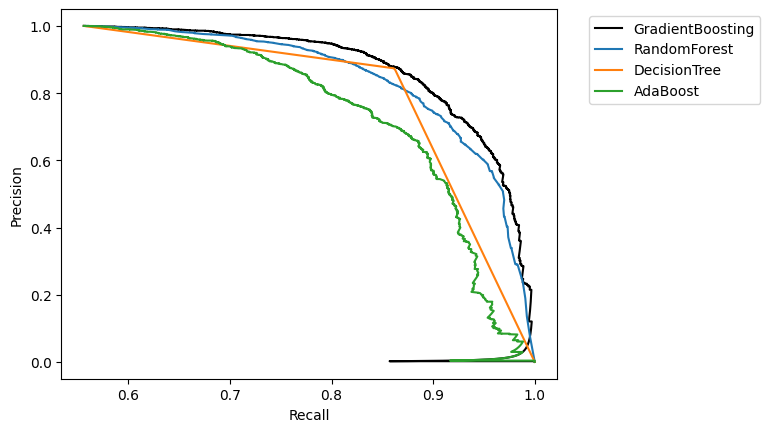

In [28]:
## plot da curva PR ##
cabecalho('Salvando curva precisionxrecall')

plt.plot(pre_grad, rec_grad, label="GradientBoosting", color='black')
plt.plot(pre_forest, rec_forest, label="RandomForest")
plt.plot(pre_tree, rec_tree, label="DecisionTree")
plt.plot(pre_ada, rec_ada, label="AdaBoost")

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel('Precision')
plt.xlabel('Recall')

#plt.show()
# plt.savefig("PR_curve.png", dpi=300, bbox_inches='tight')


In [29]:
cabecalho('Melhores parâmetros RandomizedSearch')

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import average_precision_score, make_scorer

avg_prec = make_scorer(average_precision_score)

param_grid = {
    "loss": ["log_loss"],  # use "log_loss" se estiver em sklearn>=1.2
    "learning_rate": [0.02, 0.05, 0.1, 0.2, 0.3],
    "min_samples_split": [2, 4, 8, 12, 16, 20],
    "min_samples_leaf": [1, 2, 4, 8, 12, 16, 20],
    "max_depth": [3, 5, 7, 8, 10],
    "max_features": [None, "sqrt"],
    "criterion": ["friedman_mse"],
    "subsample": [1.0],
    "max_leaf_nodes": [8, 12, 16, 20, 24, 28, 32],
    "n_estimators": [
        50, 60, 70, 80, 90, 100, 120, 140, 160, 165,
        170, 175, 180, 185, 190, 195, 200, 220, 240, 260, 270, 280, 300
    ]
}
    
random_search = RandomizedSearchCV(
    GradientBoostingClassifier(),
    param_grid,
    cv=5,
    scoring=avg_prec,  # área sob a curva precision-recall
    refit=True,
    n_iter=20,
    n_jobs=None,
    verbose=0,
    random_state=seed,
    return_train_score=False
)

random_search.fit(X, y)
print(random_search.best_params_)



##################################################
Melhores parâmetros RandomizedSearch
##################################################
{'subsample': 1.0, 'n_estimators': 240, 'min_samples_split': 16, 'min_samples_leaf': 12, 'max_leaf_nodes': 32, 'max_features': None, 'max_depth': 8, 'loss': 'log_loss', 'learning_rate': 0.3, 'criterion': 'friedman_mse'}


In [30]:
modelo = random_search.best_estimator_
print(random_search.cv_results_['mean_test_score'])

[0.83012636 0.82462904 0.84617738 0.84910957 0.87506616 0.82809768
 0.86492604 0.74000236 0.86549948 0.86611095 0.86165357 0.80648284
 0.80611465 0.83119128 0.84884603 0.83354709 0.86359513 0.81900074
 0.8524141  0.85081758]


In [ ]:
testX = test_set.drop(['Band gap', 'Material'], axis='columns')
testY = test_set['Band gap']
result = modelo.predict(testX)

print(metrics.precision_score(testY, result))
print(metrics.recall_score(testY, result))
print(metrics.average_precision_score(testY, result))

0.9231843575418994
0.9375886524822695
0.9002948810164098


### **Scores da Validação Cruzada (`mean_test_score`)**

```text
Média ≈ 0.845
```

Isso indica **boa generalização média** nas 20 folds, com valores variando de aproximadamente **0.736** a **0.874**. A oscilação entre as folds sugere que o modelo é estável mas sensível a pequenas variações no conjunto de dados.

---

### **Avaliação no Conjunto de Teste**

* **Precision**: 0.9231
* **Recall**: 0.9376
* **Average Precision (AP)**: 0.9002

#### Interpretação:

* **Precision (92.3%)**: quando o modelo prevê classe positiva, ele acerta com alta confiança.
* **Recall (93.8%)**: o modelo consegue capturar quase todos os positivos reais.
* **Average Precision**: área sob a curva precision-recall, também alta (> 90%).

---

### Conclusão:

* **Generalização estável** (CV).
* **Alta precisão e recall**, indicando ótimo desempenho tanto para evitar falsos positivos quanto falsos negativos.
* **Classificação altamente confiável**, adequado para aplicações sensíveis a erro.


In [100]:
df = pd.read_csv('./../data/processed/dataset_pbe_prototype_com_metais.csv')
df.drop(columns=['Unnamed: 0' , 'Band gap'], axis='columns', inplace=True)

In [101]:
df.head()

,Material,layergroup,media_Z,media_pon_Z,max_Z,min_Z,desvio_Z,desvio_pon_Z,media_Electronegativity,media_pon_Electronegativity,...,max_NumberUnfilledOrbitals,min_NumberUnfilledOrbitals,desvio_NumberUnfilledOrbitals,desvio_pon_NumberUnfilledOrbitals,media_Polarizability,media_pon_Polarizability,max_Polarizability,min_Polarizability,desvio_Polarizability,desvio_pon_Polarizability
0,MoS2,p-4m2,29.0,24.666667,42,16,13.0,13.703203,2.37,2.440000,...,6.0,2.0,2.0,2.108185,52.685,41.58,86.0,19.37,33.315,35.117093
1,MoS2,p-3m1,29.0,24.666667,42,16,13.0,13.703203,2.37,2.440000,...,6.0,2.0,2.0,2.108185,52.685,41.58,86.0,19.37,33.315,35.117093
2,MoS2,p-6m2,29.0,24.666667,42,16,13.0,13.703203,2.37,2.440000,...,6.0,2.0,2.0,2.108185,52.685,41.58,86.0,19.37,33.315,35.117093
3,Mo2S4,p2_1/m11,29.0,24.666667,42,16,13.0,13.703203,2.37,2.440000,...,6.0,2.0,2.0,2.108185,52.685,41.58,86.0,19.37,33.315,35.117093
4,Co2S4,p2_1/m11,21.5,19.666667,27,16,5.5,5.797509,2.23,2.346667,...,3.0,2.0,0.5,0.527046,36.185,30.58,53.0,19.37,16.815,17.724566


In [102]:
# df.dropna(subset=['layergroup'], inplace=True)
# df['layergroup'] = pd.factorize(df['layergroup'])[0]
# labels, uniques = pd.factorize(df['layergroup'])
# df['layergroup'] = labels
# layergroup_mapping = {i: val for i, val in enumerate(uniques)}

df.dropna(subset=['layergroup'], inplace=True)
labels, uniques = pd.factorize(df['layergroup'])  # primeiro, factorize
df['layergroup'] = labels                         # depois, sobrescreve
layergroup_mapping = {i: val for i, val in enumerate(uniques)}  # agora está certo


In [103]:
print(layergroup_mapping)


{0: 'p-4m2', 1: 'p-3m1', 2: 'p-6m2', 3: 'p2_1/m11', 4: 'p-1', 5: 'p2_1/b11', 6: 'pmma', 7: 'pm2_1b', 8: 'pm2a', 9: 'pm2_1n', 10: 'pmmn', 11: 'p42_12', 12: 'p31m', 13: 'p1', 14: 'pb2n', 15: 'p4/mbm', 16: 'pman', 17: 'c2/m11', 18: 'p4/mmm', 19: 'p112/a', 20: 'p4/nmm', 21: 'pmm2', 22: 'p2/b11', 23: 'cmme', 24: 'p2/m11', 25: 'p6/mmm', 26: 'pmaa', 27: 'pbma', 28: 'pb2_1m', 29: 'cmmm', 30: 'pmmm', 31: 'p2_111', 32: 'cm2m', 33: 'c211', 34: 'pbam', 35: 'p2_12_12', 36: 'p211', 37: 'p11a', 38: 'pmam', 39: 'p-62m', 40: 'p321', 41: 'pm2m', 42: 'p2_122', 43: 'cm2e', 44: 'pb11', 45: 'p3m1', 46: 'pb2_1a', 47: 'p112', 48: 'pm11', 49: 'cmm2', 50: 'cm11', 51: 'p4mm', 52: 'p-42_1m', 53: 'p-42m', 54: 'c222', 55: 'p4/nbm', 56: 'p312', 57: 'p11m', 58: 'p-31m', 59: 'p-3', 60: 'p6mm', 61: 'p3', 62: 'p-6', 63: 'p422', 64: '?', 65: 'pb2b', 66: 'p4bm', 67: 'p-4', 68: 'p112/m'}


In [104]:
# print random 
df.sample(10, random_state=42)

,Material,layergroup,media_Z,media_pon_Z,max_Z,min_Z,desvio_Z,desvio_pon_Z,media_Electronegativity,media_pon_Electronegativity,...,max_NumberUnfilledOrbitals,min_NumberUnfilledOrbitals,desvio_NumberUnfilledOrbitals,desvio_pon_NumberUnfilledOrbitals,media_Polarizability,media_pon_Polarizability,max_Polarizability,min_Polarizability,desvio_Polarizability,desvio_pon_Polarizability
611,CuTe2,2,40.500000,44.333333,52,29,11.500000,12.122064,2.000000,2.033333,...,2.0,1.0,0.500000,0.527046,45.220000,42.480000,53.44,37.000000,8.220000,8.664641
6416,AlHgTlTe4,45,56.500000,54.571429,81,13,27.681221,27.748322,1.937500,2.007143,...,5.0,0.0,2.121320,2.164180,44.567500,41.324286,55.40,34.270000,9.084391,9.645963
4655,Ga2S2,17,23.500000,23.500000,31,16,7.500000,7.500000,2.195000,2.195000,...,5.0,2.0,1.500000,1.500000,35.385000,35.385000,51.40,19.370000,16.015000,16.015000
4535,In2F2,10,29.000000,29.000000,49,9,20.000000,20.000000,2.880000,2.880000,...,5.0,1.0,2.000000,2.000000,32.850000,32.850000,62.00,3.700000,29.150000,29.150000
3102,Al2NiTe4,1,31.000000,37.428571,52,13,16.062378,17.301056,1.873333,1.932857,...,5.0,2.0,1.414214,1.421411,46.800000,43.828571,55.40,37.000000,7.559541,8.122565
5275,Pb2Cl2,20,49.500000,49.500000,82,17,32.500000,32.500000,2.745000,2.745000,...,4.0,1.0,1.500000,1.500000,31.140000,31.140000,47.71,14.570000,16.570000,16.570000
4050,Ag4Cl4H4S4,5,20.250000,20.250000,47,1,16.693936,16.693936,2.467500,2.467500,...,2.0,1.0,0.433013,0.433013,22.736777,22.736777,52.50,4.507107,18.001401,18.001401
561,IrO2,0,42.500000,31.000000,77,8,34.500000,36.366193,2.820000,3.026667,...,3.0,2.0,0.500000,0.527046,28.120000,20.493333,51.00,5.240000,22.880000,24.117638
5838,Mo2As4O12,31,27.666667,17.333333,42,8,14.383633,17.710637,2.593333,3.017778,...,6.0,2.0,1.699673,1.972027,40.346667,19.671111,86.00,5.240000,33.803043,39.624794
476,ZrSe2,2,37.000000,36.000000,40,34,3.000000,3.162278,1.940000,2.143333,...,8.0,2.0,3.000000,3.162278,73.620000,57.826667,121.00,26.240000,47.380000,49.942905


In [105]:
df['layergroup'].value_counts()

layergroup
1     1067
2      536
10     525
45     391
20     362
      ... 
55       3
40       2
14       2
66       1
68       1
Name: count, Length: 69, dtype: int64

In [106]:
# print(df['layergroup'].value_counts())

## informando quem são as features ##
df = df.dropna() 
X_new = df.drop(['Material'], axis='columns')
y_new = modelo.predict(X_new)

In [107]:
# y_new

In [108]:
## Salvando data frame com os isolantes ##
cabecalho('Salvando o dataframe com os isolantes')

df = df.reset_index(drop=True)
df_insulators = pd.DataFrame(columns=df.columns)
for i in range(len(df)):
    if y_new[i] == 1:
        nova_entrada = list(df.iloc[i])
        df_insulators.loc[len(df_insulators)] = nova_entrada


df_insulators.to_csv('./../data/processed/dataset_pred_insulators.csv')


##################################################
Salvando o dataframe com os isolantes
##################################################


In [109]:
df_insulators.sample(10, random_state=42)

,Material,layergroup,media_Z,media_pon_Z,max_Z,min_Z,desvio_Z,desvio_pon_Z,media_Electronegativity,media_pon_Electronegativity,...,max_NumberUnfilledOrbitals,min_NumberUnfilledOrbitals,desvio_NumberUnfilledOrbitals,desvio_pon_NumberUnfilledOrbitals,media_Polarizability,media_pon_Polarizability,max_Polarizability,min_Polarizability,desvio_Polarizability,desvio_pon_Polarizability
3030,Sr2Cl12Ge4,4,29.000000,22.666667,38,17,8.831761,10.867894,2.040000,2.658889,...,4.0,0.0,1.699673,1.703301,83.733333,40.386667,197.20,14.57,80.872403,91.756629
2194,Cd2Cu2Cl2S2,7,27.500000,27.500000,48,16,12.893797,12.893797,2.332500,2.332500,...,2.0,0.0,0.707107,0.707107,33.545000,33.545000,53.44,14.57,16.826224,16.826224
2031,Mg2W2O12Se2,35,32.000000,18.666667,74,8,26.191602,29.390097,2.415000,2.984444,...,6.0,0.0,2.179449,2.197080,44.342500,22.618889,75.00,5.24,29.586137,36.704970
3144,In2S3,1,32.500000,29.200000,49,16,16.500000,16.826764,2.180000,2.260000,...,5.0,2.0,1.500000,1.529706,40.685000,36.422000,62.00,19.37,21.315000,21.737120
1583,In2Br6,39,42.000000,38.500000,49,35,7.000000,7.826238,2.370000,2.665000,...,5.0,1.0,2.000000,2.236068,41.900000,31.850000,62.00,21.80,20.100000,22.472483
170,Zr2I4,3,46.500000,48.666667,53,40,6.500000,6.851602,1.995000,2.216667,...,8.0,1.0,3.500000,3.689324,77.800000,63.400000,121.00,34.60,43.200000,45.536798
1023,Na2Tl2S2,10,36.000000,36.000000,81,11,31.885211,31.885211,1.850000,1.850000,...,5.0,1.0,1.699673,1.699673,77.890000,77.890000,162.70,19.37,61.396228,61.396228
3564,Bi2O9Si3,62,35.000000,20.000000,83,8,34.029399,37.188708,2.453333,2.907143,...,4.0,2.0,0.816497,0.922139,30.850000,18.506429,50.00,5.24,18.835482,22.519750
1235,Li4As4O8,5,14.666667,13.000000,33,3,13.123346,13.228757,2.200000,2.510000,...,3.0,1.0,0.816497,0.816497,66.346667,51.070000,164.00,5.24,69.775490,71.428255
289,Os2Te4,3,64.000000,60.000000,76,52,12.000000,12.649111,2.150000,2.133333,...,4.0,2.0,1.000000,1.054093,47.000000,43.666667,57.00,37.00,10.000000,10.540926


In [110]:
df_insulators.value_counts()

Material   layergroup  media_Z    media_pon_Z  max_Z  min_Z  desvio_Z   desvio_pon_Z  media_Electronegativity  media_pon_Electronegativity  max_Electronegativity  min_Electronegativity  desvio_Electronegativity  desvio_pon_Electronegativity  media_IonizationPotential  media_pon_IonizationPotential  max_IonizationPotential  min_IonizationPotential  desvio_IonizationPotential  desvio_pon_IonizationPotential  media_ElectronAffinity  media_pon_ElectronAffinity  max_ElectronAffinity  min_ElectronAffinity  desvio_ElectronAffinity  desvio_pon_ElectronAffinity  media_HOMO  media_pon_HOMO  max_HOMO  min_HOMO  desvio_HOMO  desvio_pon_HOMO  media_LUMO  media_pon_LUMO  max_LUMO  min_LUMO  desvio_LUMO  desvio_pon_LUMO  media_r_s_orbital  media_pon_r_s_orbital  max_r_s_orbital  min_r_s_orbital  desvio_r_s_orbital  desvio_pon_r_s_orbital  media_r_p_orbital  media_pon_r_p_orbital  max_r_p_orbital  min_r_p_orbital  desvio_r_p_orbital  desvio_pon_r_p_orbital  media_r_d_orbital  media_pon_r_d_orbital  ma